In [1]:
!pip install ucimlrepo

#Importing the Required Libraries


In [2]:
import pandas as pd
import warnings
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import files

In [3]:
census_income = fetch_ucirepo(id=20)

In [4]:
X = census_income.data.features
y = census_income.data.targets

In [5]:
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

#Converting the Table format to CSV

In [6]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [7]:
X_df.to_csv('features.csv', index=False)
y_df.to_csv('targets.csv', index=False)

In [8]:
X_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [9]:
y_df.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [10]:
merged_df = pd.concat([X_df, y_df], axis=1)

In [11]:

# Export the merged DataFrame to CSV
merged_df.to_csv('merged_data.csv',index=False)

##Basic Representation of our Data

In [12]:
merged_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
merged_df.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_values_column_A = merged_df['income'].isnull().sum()
null_values_column_A

0

#Considering only the required columns based on their datatype

In [14]:
# numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
# categorical_features = ['workclass','education','marital-status','occupation','relationship','race','sex']
numeric_features = ['age','hours-per-week']
categorical_features = ['education','marital-status','occupation','relationship']

#Converting our target to binary format


In [15]:
y_df = (y_df['income'] == '>50K').astype(int)

In [16]:
y_df.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [17]:
merged_df_1 = pd.concat([X_df, y_df], axis=1)

# Export the merged DataFrame to CSV
merged_df_1.to_csv('merged_data_1.csv',index=False)

In [18]:
merged_df_1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
files.download('merged_data_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Pre-Processing the Data

In [17]:
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,numeric_features),
        ('cat', categorical_transformer,categorical_features)
    ]
)

In [19]:
X_processed = preprocessor.fit_transform(X_df)

#Splitting the Data


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_processed,y_df,test_size=0.2,random_state=42)

#Implementing Total 6 models

##RandomForest Classifier

In [ ]:
clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8251612242808886
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8207
           1       0.44      0.33      0.37      1562

    accuracy                           0.83      9769
   macro avg       0.66      0.62      0.64      9769
weighted avg       0.81      0.83      0.81      9769



In [ ]:
joblib.dump(clf, 'RandomForest_model.pkl')

['RandomForest_model.pkl']

##Prediction through RandomForest Classifier

In [ ]:
input_data = {feature: 0 for feature in numeric_features}
input_data.update({feature: "Unknown" for feature in categorical_features})

for feature in categorical_features:
    input_data[feature] = str(input(f"Enter the value for {feature}: "))

for feature in numeric_features:
    input_data[feature] = float(input(f"Enter the value for {feature}: "))

input_processed = preprocessor.transform(pd.DataFrame(input_data, index=[0]))
print(input_data)

prediction = clf.predict(input_processed)[0]

if prediction == 1:
    print("Income is predicted to exceed $50K/yr.")
else:
    print("Income is predicted to be $50K/yr or less.")

Enter the value for education: Bachelors
Enter the value for marital-status: Divorced
Enter the value for occupation: Craft-repair
Enter the value for relationship: Unmarried
Enter the value for age: 33
Enter the value for hours-per-week: 55
{'age': 33.0, 'hours-per-week': 55.0, 'education': 'Bachelors', 'marital-status': 'Divorced', 'occupation': 'Craft-repair', 'relationship': 'Unmarried'}
Income is predicted to be $50K/yr or less.


##KNeighbours Classification

In [ ]:
clf2 = KNeighborsClassifier()

clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.826696693622684
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8207
           1       0.44      0.31      0.36      1562

    accuracy                           0.83      9769
   macro avg       0.66      0.62      0.63      9769
weighted avg       0.81      0.83      0.81      9769



In [ ]:
joblib.dump(clf2, 'Kneoghbours_model.pkl')

['Kneoghbours_model.pkl']

##Prediction through Kneighbours Classification

In [ ]:
input_data2 = {feature: 0 for feature in numeric_features}
input_data2.update({feature: "Unknown" for feature in categorical_features})

for feature in categorical_features:
    input_data2[feature] = str(input(f"Enter the value for {feature}: "))

for feature in numeric_features:
    input_data2[feature] = float(input(f"Enter the value for {feature}: "))

input_processed2 = preprocessor.transform(pd.DataFrame(input_data, index=[0]))

prediction2 = clf2.predict(input_processed2)[0]

if prediction2 == 1:
    print("Income is predicted to exceed $50K/yr.")
else:
    print("Income is predicted to be $50K/yr or less.")

Enter the value for education: Bachelors
Enter the value for marital-status: Divorced
Enter the value for occupation: Craft-repair
Enter the value for relationship: Unmarried
Enter the value for age: 33
Enter the value for hours-per-week: 55
Income is predicted to be $50K/yr or less.


##Logistic Regression

In [ ]:
clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

y_pred3 = clf3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.8425632101545706
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8207
           1       0.52      0.24      0.32      1562

    accuracy                           0.84      9769
   macro avg       0.69      0.60      0.62      9769
weighted avg       0.81      0.84      0.82      9769



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
joblib.dump(clf3, 'LogisticRegression_model.pkl')

['LogisticRegression_model.pkl']

##Prediction through Logistic Regression

In [ ]:
input_data3 = {feature: 0 for feature in numeric_features}
input_data3.update({feature: "Unknown" for feature in categorical_features})

for feature in categorical_features:
    input_data3[feature] = str(input(f"Enter the value for {feature}: "))

for feature in numeric_features:
    input_data3[feature] = float(input(f"Enter the value for {feature}: "))

input_processed3 = preprocessor.transform(pd.DataFrame(input_data, index=[0]))

prediction3 = clf3.predict(input_processed3)[0]

if prediction3 == 1:
    print("Income is predicted to exceed $50K/yr.")
else:
    print("Income is predicted to be $50K/yr or less.")

Enter the value for education: Bachelors
Enter the value for marital-status: Divorced
Enter the value for occupation: Craft-repair
Enter the value for relationship: Unmarried
Enter the value for age: 33
Enter the value for hours-per-week: 55
Income is predicted to be $50K/yr or less.


##SVC

In [ ]:
clf4 = SVC()
clf4.fit(X_train, y_train)

y_pred4 = clf4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred4))

Accuracy: 0.846043607329307
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      8207
           1       0.55      0.22      0.31      1562

    accuracy                           0.85      9769
   macro avg       0.71      0.59      0.61      9769
weighted avg       0.82      0.85      0.82      9769



In [ ]:
joblib.dump(clf4, 'SVC_model.pkl')

['SVC_model.pkl']

##Prediction through SVC

In [ ]:
input_data4 = {feature: 0 for feature in numeric_features}
input_data4.update({feature: "Unknown" for feature in categorical_features})

for feature in categorical_features:
    input_data4[feature] = str(input(f"Enter the value for {feature}: "))

for feature in numeric_features:
    input_data4[feature] = float(input(f"Enter the value for {feature}: "))

input_processed4 = preprocessor.transform(pd.DataFrame(input_data, index=[0]))

prediction4 = clf4.predict(input_processed4)[0]

if prediction4 == 1:
    print("Income is predicted to exceed $50K/yr.")
else:
    print("Income is predicted to be $50K/yr or less.")

Enter the value for education: Bachelors
Enter the value for marital-status: Divorced
Enter the value for occupation: Craft-repair
Enter the value for relationship: Unmarried
Enter the value for age: 33
Enter the value for hours-per-week: 55
Income is predicted to be $50K/yr or less.


##DecisionTree Classifier

In [ ]:
clf5 =  DecisionTreeClassifier(random_state=42)
clf5.fit(X_train, y_train)

y_pred5 = clf5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred5))

Accuracy: 0.8067355921793428
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      8207
           1       0.37      0.30      0.33      1562

    accuracy                           0.81      9769
   macro avg       0.62      0.60      0.61      9769
weighted avg       0.79      0.81      0.80      9769



In [ ]:
joblib.dump(clf5, 'DecisionTree_model.pkl')

['DecisionTree_model.pkl']

##Prediction through DecisionTree Classifier

In [ ]:
input_data5 = {feature: 0 for feature in numeric_features}
input_data5.update({feature: "Unknown" for feature in categorical_features})

for feature in categorical_features:
    input_data5[feature] = str(input(f"Enter the value for {feature}: "))

for feature in numeric_features:
    input_data5[feature] = float(input(f"Enter the value for {feature}: "))

input_processed5 = preprocessor.transform(pd.DataFrame(input_data, index=[0]))

prediction5 = clf5.predict(input_processed5)[0]

if prediction5 == 1:
    print("Income is predicted to exceed $50K/yr.")
else:
    print("Income is predicted to be $50K/yr or less.")

Enter the value for education: Bachelors
Enter the value for marital-status: Divorced
Enter the value for occupation: Craft-repair
Enter the value for relationship: Unmarried
Enter the value for age: 33
Enter the value for hours-per-week: 55
Income is predicted to be $50K/yr or less.


##XGB Classifier

In [ ]:
clf6 = XGBClassifier(random_state=42)
clf6.fit(X_train, y_train)

y_pred6 = clf6.predict(X_test)

accuracy = accuracy_score(y_test, y_pred6)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred6))

Accuracy: 0.8438939502507933
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8207
           1       0.52      0.26      0.35      1562

    accuracy                           0.84      9769
   macro avg       0.70      0.61      0.63      9769
weighted avg       0.82      0.84      0.82      9769



In [ ]:
joblib.dump(clf6, 'XGBmodel.pkl')

['XGBmodel.pkl']

##Prediction through XGB Classifier

In [ ]:
input_data6 = {feature: 0 for feature in numeric_features}
input_data6.update({feature: "Unknown" for feature in categorical_features})

for feature in categorical_features:
    input_data6[feature] = str(input(f"Enter the value for {feature}: "))

for feature in numeric_features:
    input_data6[feature] = float(input(f"Enter the value for {feature}: "))

input_processed6 = preprocessor.transform(pd.DataFrame(input_data, index=[0]))

prediction6 = clf6.predict(input_processed6)[0]

if prediction6 == 1:
    print("Income is predicted to exceed $50K/yr.")
else:
    print("Income is predicted to be $50K/yr or less.")

Enter the value for education: Bachelors
Enter the value for marital-status: Divorced
Enter the value for occupation: Carft-repair
Enter the value for relationship: Unamrried
Enter the value for age: 33
Enter the value for hours-per-week: 55
Income is predicted to be $50K/yr or less.


    After implementing and comparing all the models, we conclude that SVC(Support Vector Classifier) model works best with an accuracy of 84.6%

#Visualisation

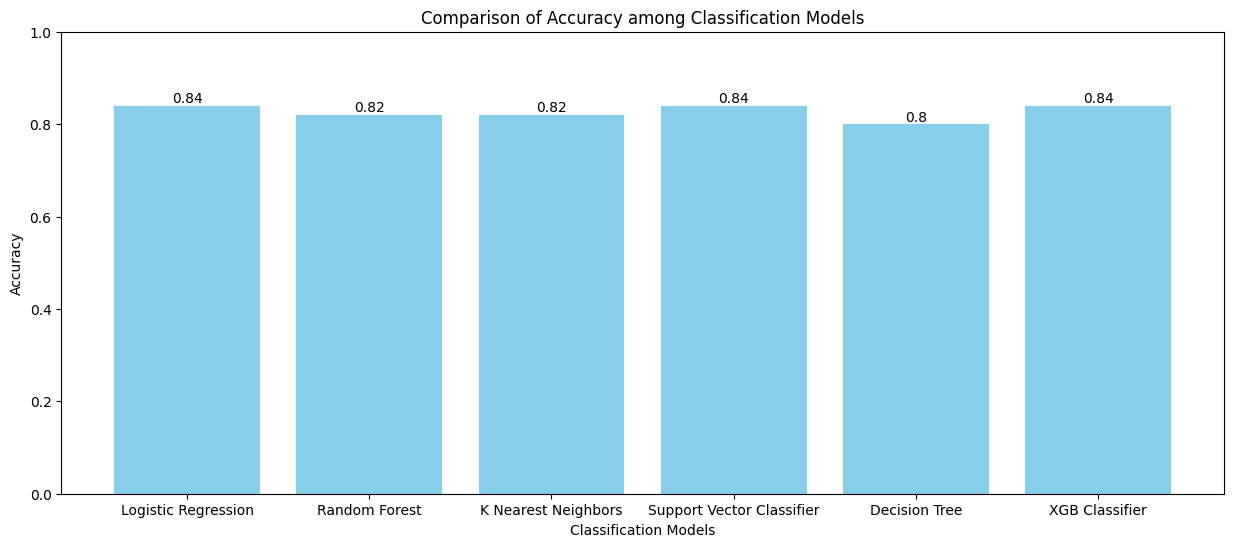

In [ ]:
classifiers = ['Logistic Regression', 'Random Forest', 'K Nearest Neighbors', 'Support Vector Classifier', 'Decision Tree', 'XGB Classifier']
accuracy_scores = [0.84, 0.82, 0.82, 0.84, 0.80, 0.84]


plt.figure(figsize=(15, 6))
bars=plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy among Classification Models')
plt.ylim(0, 1)

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom', color='black', fontsize=10)
plt.show()

In [29]:
temp = merged_df[merged_df["income"] == '>50K']

country_vs_age = merged_df[["native-country","income","age"]].groupby(["native-country","income"]).mean()

##Based on Education

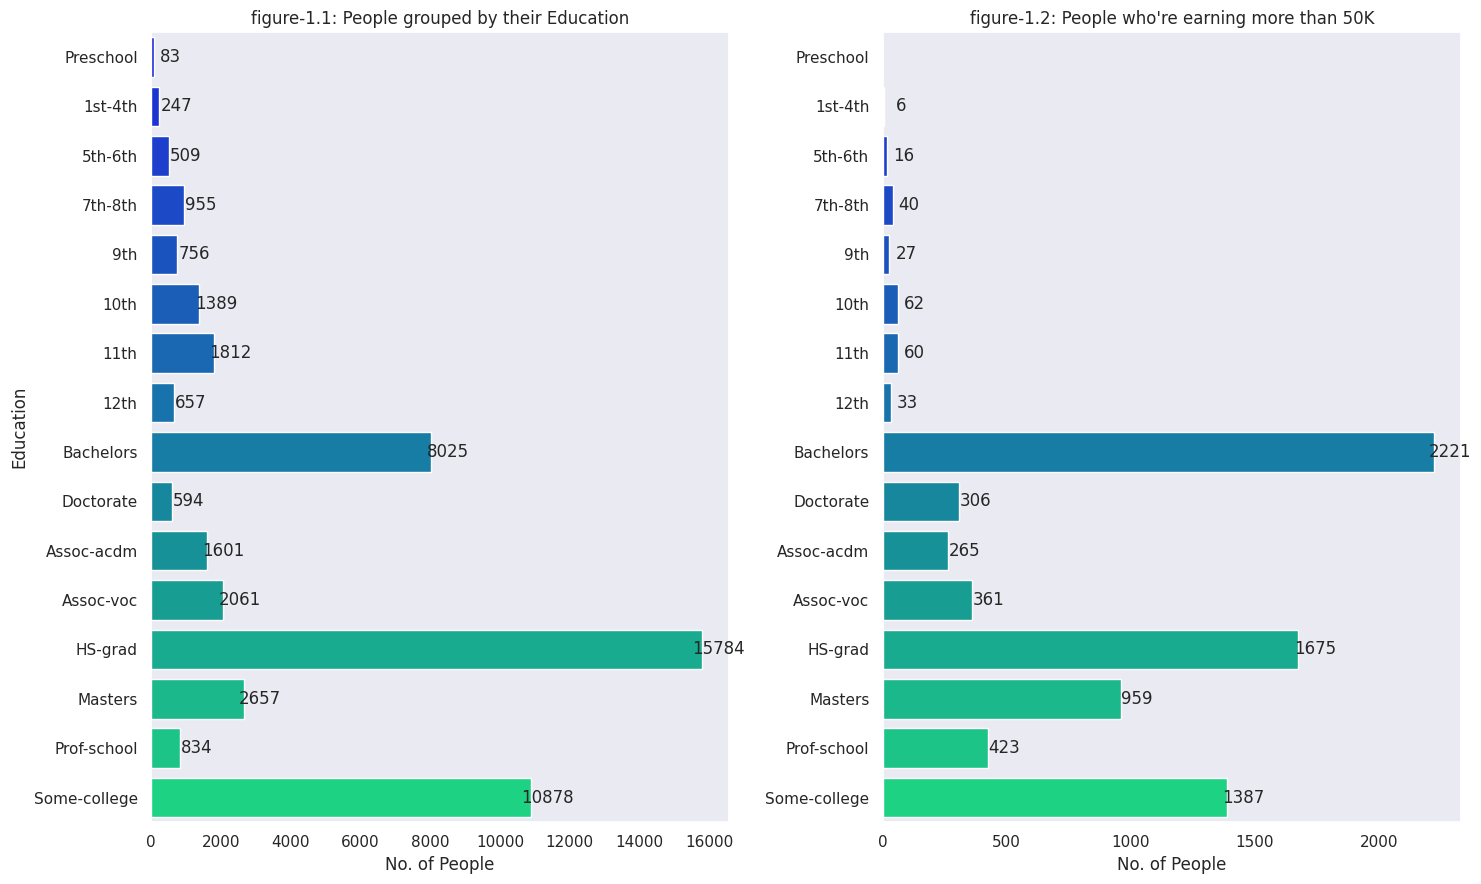

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

education_size = merged_df.groupby('education').size()

more_income = merged_df.loc[merged_df['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style='dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1, 2)

ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("figure-1.1: People grouped by their Education")
ax[1].title.set_text("figure-1.2: People who're earning more than 50K")

sns_ed_1 = sns.barplot(x=list(education_size), y=list(education_size.index), palette='winter',
                       order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                              'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax=ax[0])

sns_ed_2 = sns.barplot(x=list(more_income), y=list(more_income.index), palette='winter',
                       order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                              'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax=ax[1])

for p in sns_ed_1.patches:
    sns_ed_1.annotate(format(p.get_width(), '.0f'),
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha = 'center', va = 'center',
                       xytext = (12, 0),
                       textcoords = 'offset points')

for p in sns_ed_2.patches:
    sns_ed_2.annotate(format(p.get_width(), '.0f'),
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha = 'center', va = 'center',
                       xytext = (12, 0),
                       textcoords = 'offset points')

plt.tight_layout()
plt.show()

warnings.filterwarnings('ignore')

    figure 1.1: Income of People grouped by their education
    figure 1.2: Income of People who's earning more than 50k grouped by their education


##WorkClass Vs Age

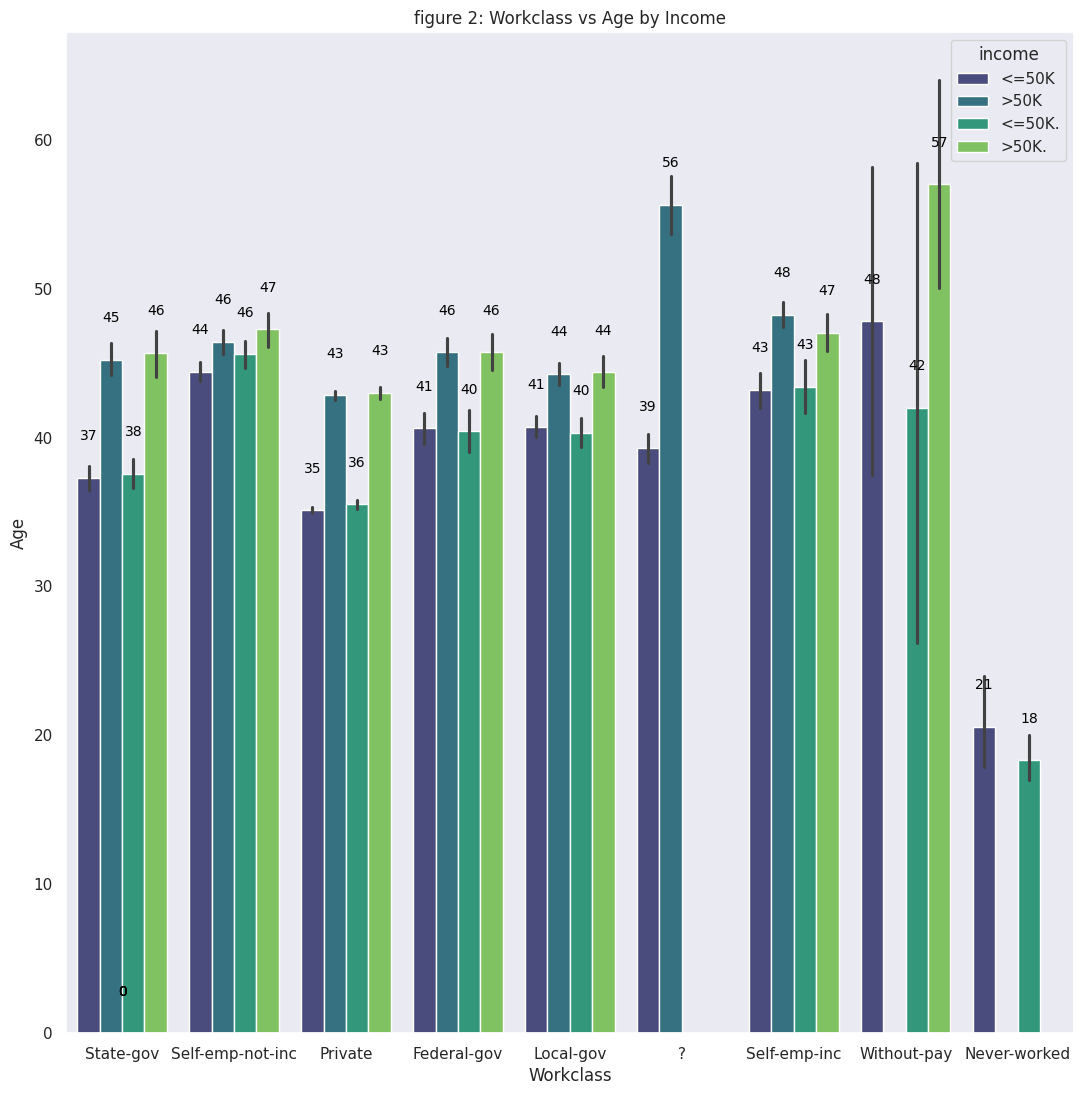

In [24]:
import numpy as np

plt.figure(figsize=(13, 13))
ax = sns.barplot(x="workclass", y="age", hue="income", data=merged_df, palette="viridis")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 30),
                textcoords='offset points')

plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("figure 2: Workclass vs Age by Income")
plt.show()


    figure 2: Workclass vs Age of People and their income represented by different colors

##Representation through Race

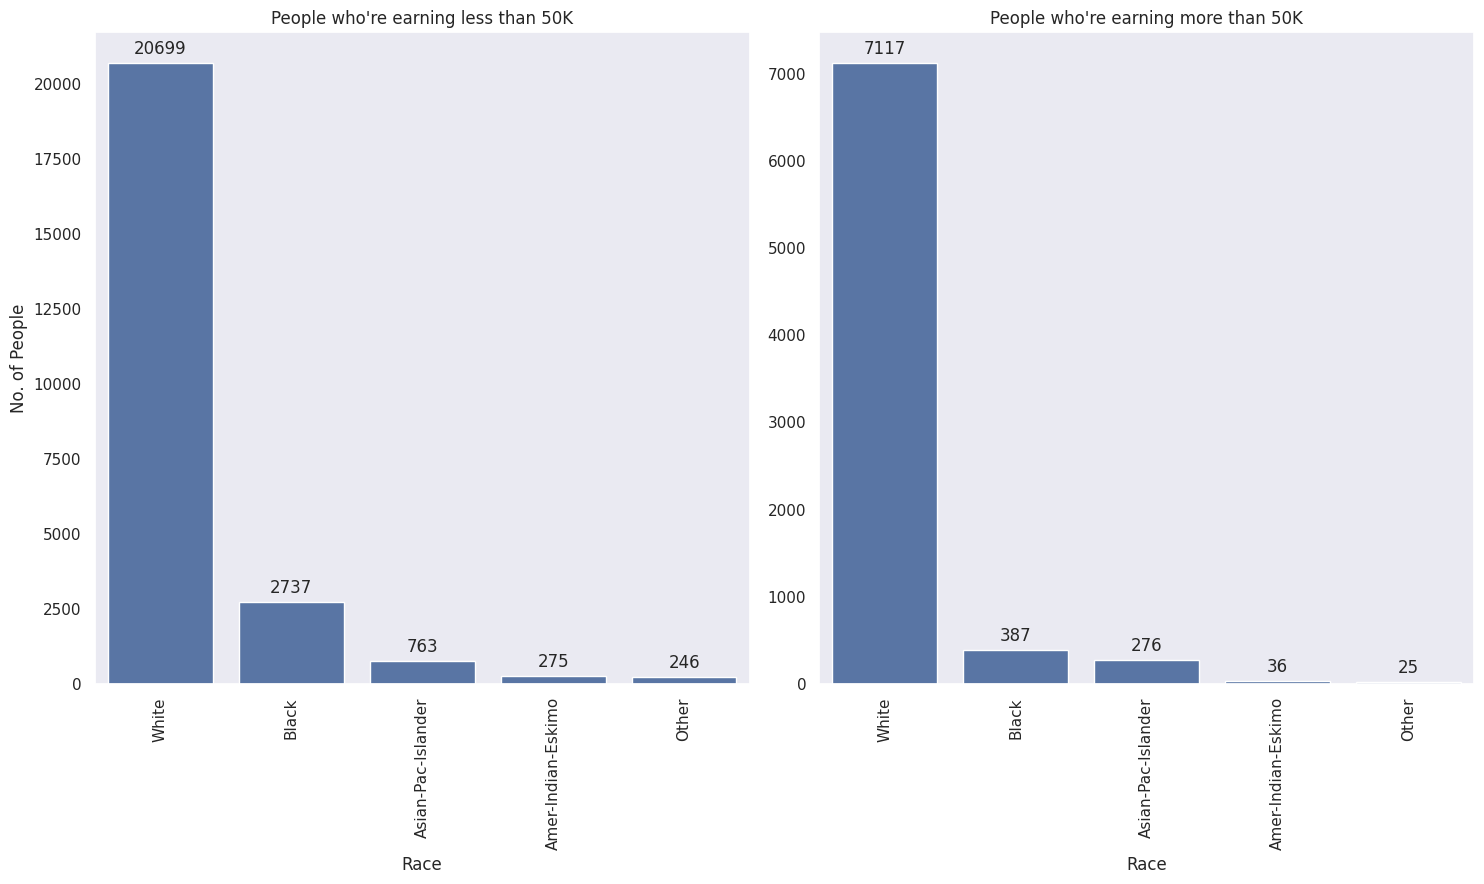

In [25]:
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel('Race')
ax[1].set_xlabel('Race')
ax[0].set_ylabel('No. of People')
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

race_less = merged_df.loc[merged_df['income'] == '<=50K'].groupby('race').size()
race_more = merged_df.loc[merged_df['income'] == '>50K'].groupby('race').size()

sns_race_1 = sns.barplot(x=list(race_less.index), y=list(race_less), ax=ax[0],
                         order=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])
sns_race_2 = sns.barplot(x=list(race_more.index), y=list(race_more), ax=ax[1],
                         order=['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])

plt.setp(sns_race_1.get_xticklabels(), rotation=90)
plt.setp(sns_race_2.get_xticklabels(), rotation=90)

for p in sns_race_1.patches:
    sns_race_1.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

for p in sns_race_2.patches:
    sns_race_2.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

plt.tight_layout()
plt.show()


    figure 3.1: People with their race who's earning less than 50k
    figure 3.1: People with their race who's earning more than 50k

##Checking through Relationship status

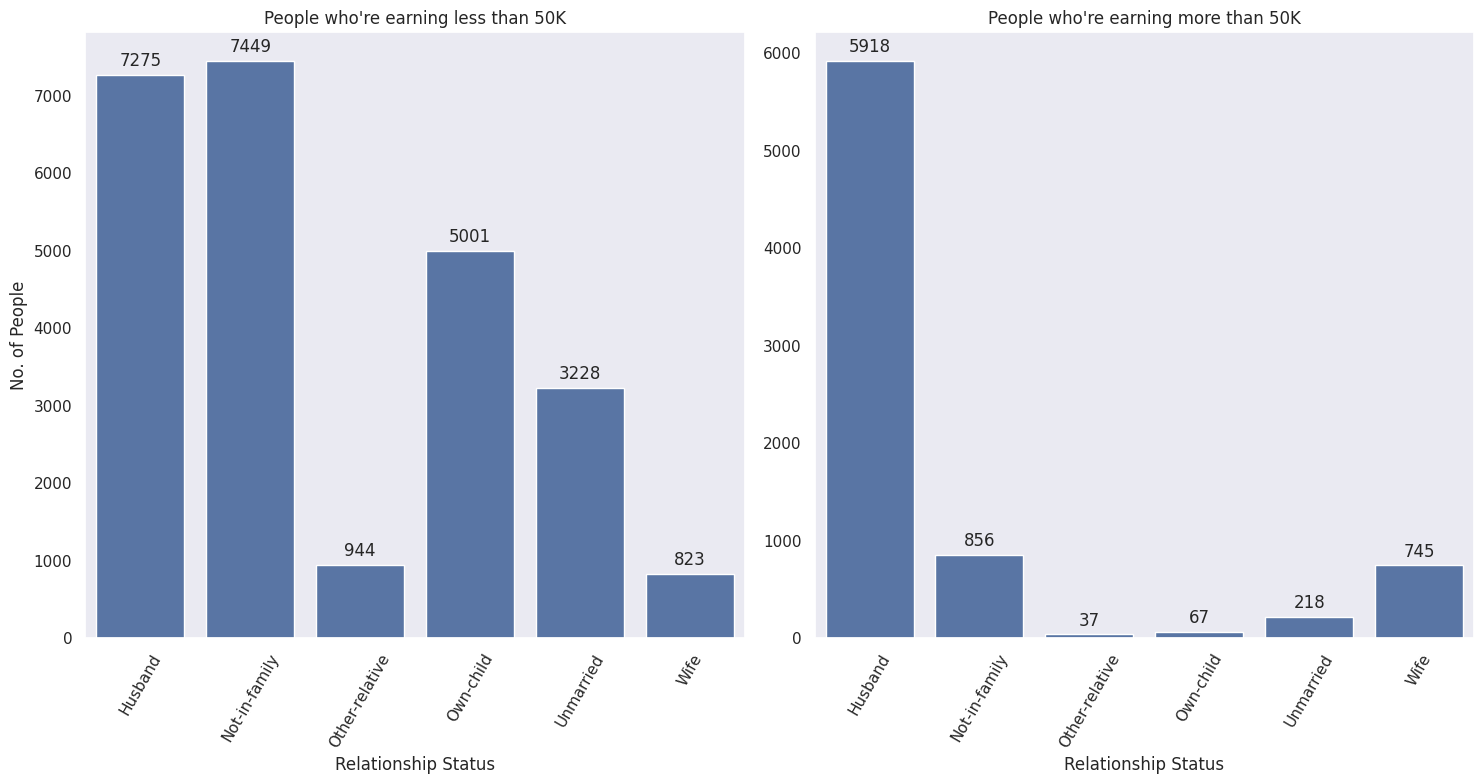

In [26]:
plt.rcParams['figure.figsize'] = [15, 8]
fig, ax = plt.subplots(1, 2)

ax[0].set_ylabel("No. of People")
ax[0].set_xlabel("Relationship Status")
ax[1].set_xlabel("Relationship Status")
ax[0].title.set_text("People who're earning less than 50K")
ax[1].title.set_text("People who're earning more than 50K")

rel_less = merged_df.loc[merged_df['income'] == '<=50K', ['relationship']].groupby('relationship').size()
rel_more = merged_df.loc[merged_df['income'] == '>50K', ['relationship']].groupby('relationship').size()

sns_rel_1 = sns.barplot(x=list(rel_less.index), y=list(rel_less), ax=ax[0])
sns_rel_2 = sns.barplot(x=list(rel_more.index), y=list(rel_more), ax=ax[1])

plt.setp(sns_rel_1.get_xticklabels(), rotation=60)
plt.setp(sns_rel_2.get_xticklabels(), rotation=60)

for p in sns_rel_1.patches:
    sns_rel_1.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

for p in sns_rel_2.patches:
    sns_rel_2.annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


    figure 4.1: People with their Relationship status who's earning less than 50k
    figure 4.2: People with their Relationship status who's earning more than 50k

##Inspecting through Gender

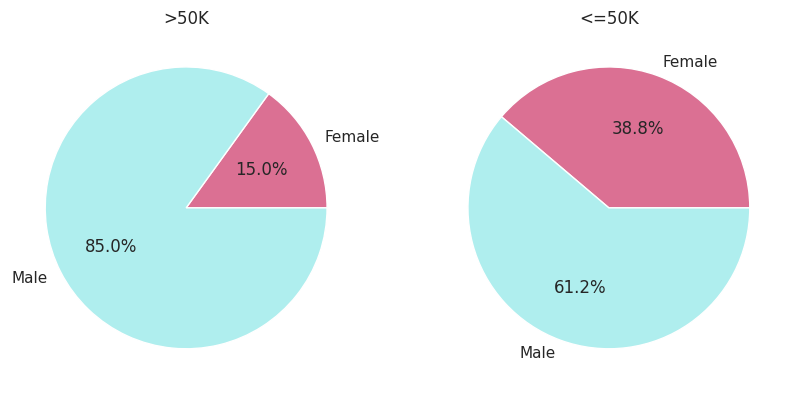

In [30]:
over_50_data = temp[["sex","income"]].groupby(["sex"]).count()
over_50_data = over_50_data.reset_index()
temp2 = merged_df[merged_df["income"] == '<=50K']
less_50_data = temp2[["sex","income"]].groupby(["sex"]).count()
less_50_data = less_50_data.reset_index()
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.pie(x = over_50_data["income"], labels = ["Female","Male"],colors = ["palevioletred","paleturquoise"], autopct='%1.1f%%')
plt.title(">50K")

plt.subplot(1,2,2)
plt.pie(x = less_50_data["income"], labels = ["Female","Male"], colors = ["palevioletred","paleturquoise"], autopct='%1.1f%%')
plt.title("<=50K")
plt.show()


    figure 5.1: Sex difference who's earning less than 50k
    figure 5.2: Sex difference who's earning more than 50k